In [6]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt , seaborn as sns

In [8]:
df = sns.load_dataset('tips')

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- There is no null values Present in the table.

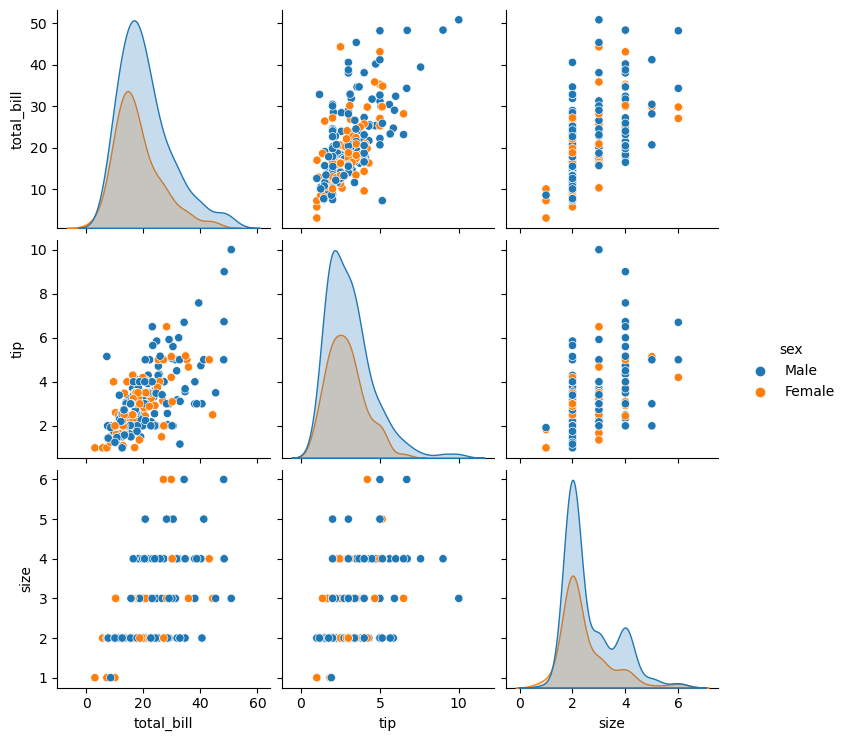

In [13]:
sns.pairplot(df,hue='sex')

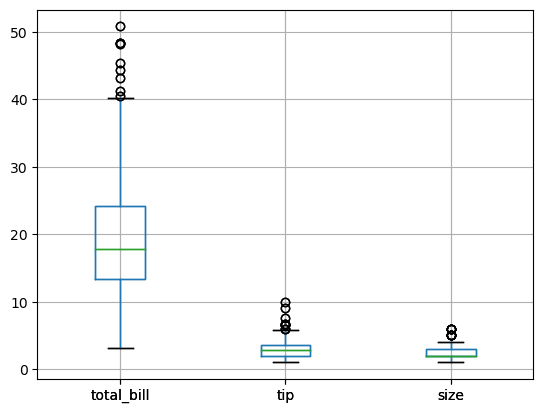

In [16]:
df.boxplot()
plt.show()

- The numerical columns contain outliers so we have to use Robust Scaler for scaling and Yeo-johnson for transformation

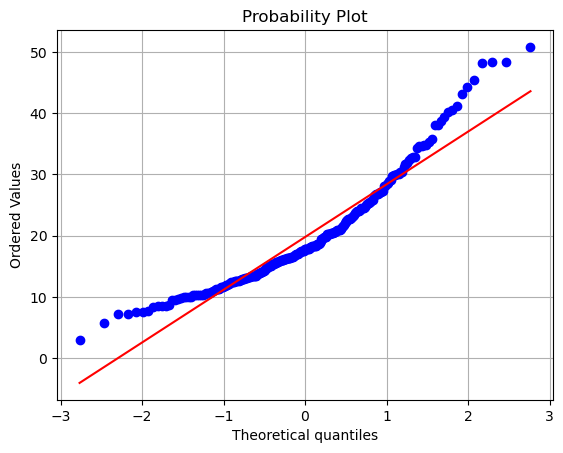

In [17]:
import scipy
from scipy import stats
stats.probplot(df['total_bill'],dist = 'norm', plot=plt)
plt.grid()
plt.show()

In [21]:
df['total_bill'].skew()

1.1332130376158205

- The limits for skewness is -1 to +1 so this column is highly skewed.

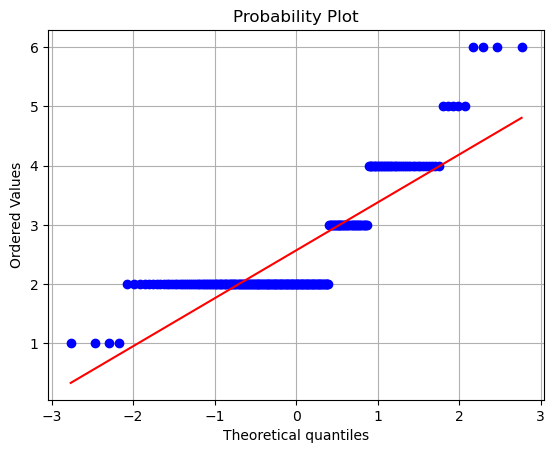

In [23]:
stats.probplot(df['size'],dist = 'norm', plot=plt)
plt.grid()
plt.show()

In [24]:
# Size is in numerical column so we have to convert that into categorical column

df['size']=df['size'].astype('category')


In [38]:
# Assigning the columns according to catagorical and numerical and our dependent or target column

contcol=["total_bill"]
ordcatcol=["size",'smoker']
nomcatcol=["sex","time","day"]
target = ['tip']

In [34]:
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [35]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Creating a column transformer using pipelines for Preprocessing and transformations

In [39]:
column_transformation = ColumnTransformer(
    transformers=[
    ('continous',Pipeline([('Roboust_scalar',RobustScaler()),
                           ('Yoe_johnson',PowerTransformer())]),contcol),
        
    ('nominal_cat',Pipeline([('nominal',OneHotEncoder(drop='first'))]),nomcatcol),
    
        ('ordinal_cat',Pipeline([('ordinal',OrdinalEncoder())]),ordcatcol)
    ],remainder='drop')

In [40]:
display(column_transformation)

ColumnTransformer(transformers=[('continous',
                                 Pipeline(steps=[('Roboust_scalar',
                                                  RobustScaler()),
                                                 ('Yoe_johnson',
                                                  PowerTransformer())]),
                                 ['total_bill']),
                                ('nominal_cat',
                                 Pipeline(steps=[('nominal',
                                                  OneHotEncoder(drop='first'))]),
                                 ['sex', 'time', 'day']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['size', 'smoker'])])

In [42]:
# spltinng the columns
x = df[contcol+ordcatcol+nomcatcol]
y = df[target]

In [61]:
# Spliting the data into train test split

xtrain, xtest,ytrain,ytest = train_test_split(x,y,
                                             test_size = 0.3)

In [62]:
t_xtrain = column_transformation.fit_transform(xtrain)
t_xtest = column_transformation.transform(xtest)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 15
kr = KNeighborsRegressor(n_neighbors = n_neighbors)

In [70]:
kr.fit(t_xtrain,ytrain)
#ytrainpred = kr.predict(t_xtrain)
#ytestpred = kr.predict(xtest)

KNeighborsRegressor(n_neighbors=15)

In [71]:
ytrainpred = kr.predict(t_xtrain)

In [72]:
ytestpred = kr.predict(t_xtest)

In [73]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain, ytrainpred), mean_squared_error(ytest, ytestpred)

(0.8050454091503267, 1.7725675495495494)